## 군집
* 군집(Clustering)은 데이터셋을 클러스터(Cluster)라는 그룹으로 나누는 작업입니다. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표입니다.분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어는 클러스터에 속하는지 할당(또는 예측)합니다.

### K-평균 군집
* K-평균(K-means)군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘입니다. 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾습니다. 알고리즘은 두 단계를 반복합니다. 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정합니다. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료됩니다. 다음은 예시용 데이터셋에 *k*-평균 군집을 적용한 예입니다.

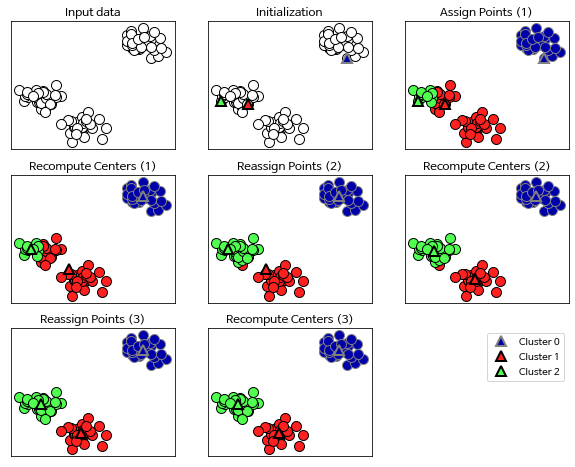

In [2]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

[입력 데이터와 *k*-평균 군집 알고리즘이 세 번 진행되기까지의 과정]

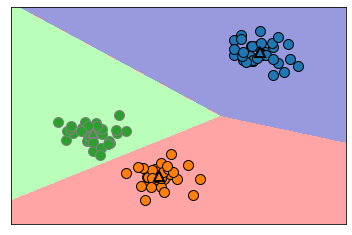

In [3]:
mglearn.plots.plot_kmeans_boundaries()

[*k*-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계]

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 인위적으로 2차원 데이터를 생성합니다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [9]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


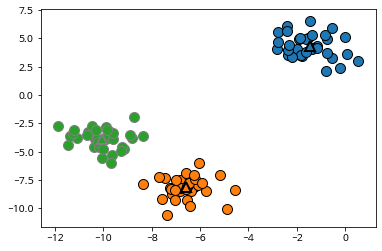

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=2)

[*k*-평균 알고리즘으로 찾은 세 개의 클러스터 중심과 클러스터 할당(Three cluster centroids and cluster assignments found by the k-means algorithm)]

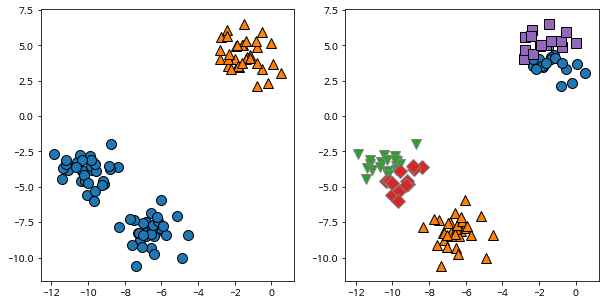

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

[*k*-평균 알고리즘으로 클러스터를 두 개 사용했을 때(왼쪽)와 다섯 개 사용했을 때(오른쪽)의 클러스터 할당(Cluster assignments by using two(left) or five(right) clusters with K-means algorithm)]

#### K-평균 알고리즘(K-Means algorithm)이 실패하는 경우

Text(0, 0.5, '특성 1')

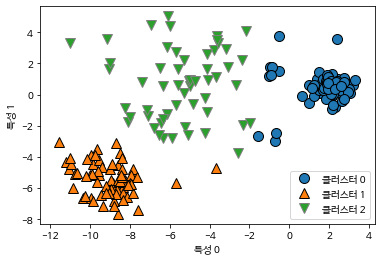

In [17]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[클러스터의 밀도가 다를 때 *k*-평균으로 찾은 클러스터 할당(assign clusters which found by K-Means when each cluster has different densities)]

Text(0, 0.5, '특성 1')

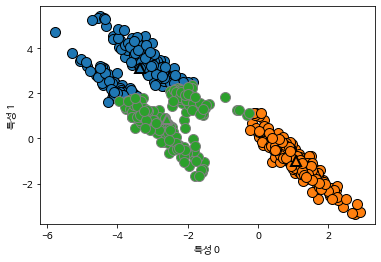

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[원형이 아닌 클러스터를 구분하지 못하는 *k*-평균 알고리즘(k-means algorithm that does not distinguish non-round clusters)]